<h2 style="color:blue" align="center">Handwritten digits classification using ANN</h2>

In this notebook we will classify handwritten digits using a simple neural network (ANN) first and than repeat same thing with convolutional neural network. We will see how accuracy improves clickly when you use convolutional neural network.

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
X_train[0].shape

(28, 28)

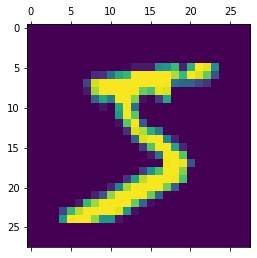

In [6]:
plt.matshow(X_train[0])

In [7]:
y_train[0]

5

In [8]:
X_train = X_train / 255
X_test = X_test / 255

In [9]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [10]:
X_train_flattened.shape

(60000, 784)

# <h3 style='color:purple'>Using ANN for classification</h3>

In [11]:
model = model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2764 - accuracy: 0.9218
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1253 - accuracy: 0.9631
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0854 - accuracy: 0.9746
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0639 - accuracy: 0.9804
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0508 - accuracy: 0.9843


In [14]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [15]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0721 - accuracy: 0.9785


[0.07209555059671402, 0.9785000085830688]

# Callbacks

In [16]:
from tensorflow.keras.callbacks import Callback, CSVLogger, EarlyStopping, LearningRateScheduler, ModelCheckpoint, ReduceLROnPlateau

# ModelCheckpoint

In [17]:
model = model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

In [18]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
# defining model checkpointing

# defining the path to store the weights
filepath="best_weights.hdf5"

In [20]:
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

In [21]:
model.fit(X_train_flattened, y_train, epochs=50, batch_size=128, validation_data=(X_test_flattened,y_test), callbacks=[checkpoint])

Epoch 1/50
460/469 [============================>.] - ETA: 0s - loss: 0.3792 - accuracy: 0.8982
Epoch 1: val_accuracy improved from -inf to 0.94110, saving model to best_weights.hdf5
469/469 [==============================] - 2s 4ms/step - loss: 0.3757 - accuracy: 0.8991 - val_loss: 0.2035 - val_accuracy: 0.9411
Epoch 2/50
467/469 [============================>.] - ETA: 0s - loss: 0.1769 - accuracy: 0.9502
Epoch 2: val_accuracy improved from 0.94110 to 0.95650, saving model to best_weights.hdf5
469/469 [==============================] - 2s 4ms/step - loss: 0.1767 - accuracy: 0.9503 - val_loss: 0.1484 - val_accuracy: 0.9565
Epoch 3/50
459/469 [============================>.] - ETA: 0s - loss: 0.1311 - accuracy: 0.9627
Epoch 3: val_accuracy improved from 0.95650 to 0.96330, saving model to best_weights.hdf5
469/469 [==============================] - 2s 4ms/step - loss: 0.1306 - accuracy: 0.9627 - val_loss: 0.1227 - val_accuracy: 0.9633
Epoch 4/50
463/469 [============================>.] 

In [23]:
# loading the best model
model.load_weights("best_weights.hdf5")

In [24]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0991 - accuracy: 0.9799


[0.09913076460361481, 0.9799000024795532]